# Inelastic Scattering for Ar Pre-Plated MCM-41 Nanopores

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from dgutils import colors as colortools

import matplotlib as mpl
import matplotlib.colors as mplcolors

import spens
from heprops import helium

import pickle,os

# Notebook display options
%config InlineBackend.figure_format = 'retina'

# plot style
plot_style = {'sans':'../include/sans.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['sans'])
figsize = plt.rcParams['figure.figsize']

## Load the Neutron Scattering Data

In [84]:
# load the Neutron Scattering data
Q,E,S,ΔS = spens.load_file('../data/SQW_2p5A_25-22_sf975.spe')

# we mask the low-energy scattering that is influenced by the elastic spill-over.
idx = np.where(E<0.5)[0]
S[:,idx] = 100

# create meshes for plotting
Enew = np.zeros(69)
Enew[1:] = np.copy(E)
Enew[0] = np.min(E)-(E[5]-E[4])
Qnew = np.zeros(49)
Qnew[1:] = np.copy(Q)
Qnew[0] = np.min(Q)-(Q[5]-Q[4])
Emesh,Qmesh = np.meshgrid(E,Q)

In [54]:
Q.shape

(48,)

In [52]:
np.max(E),np.min(E),E[5]-E[4]

(4.9948, 0.014413, 0.07444)

## Load the Bulk Helium and 1D threshold

### The predicted threshold for hard rods

\begin{equation}
\omega_{\pm}(q) = \frac{4}{K_L} \left \lvert \frac{q}{2q_{\rm F}} \pm \left(\frac{q}{2q_{\rm F}}\right)^2\right \rvert
\end{equation}

In [36]:
ΔQ = Q[3]-Q[2]

In [58]:
_Q = np.linspace(1.0,4.0,1000)
ϵ = helium.helium_dispersion_svp(_Q)*0.0862 # convert from K to meV

#bulk_roton = np.loadtxt('../data/He4_roton_CW.dat')
LL_threshold = np.loadtxt('../data/LL_fit_curve.dat')

# these values have been extracted from an external analysis
KL = 1.212
kF = 0.8

def ω(p,q,KL,qF):
    return (4.0/KL)*np.abs(q/(2*qF) + p*(q/(2*qF))**2)

_ω = ω(1,_Q-2*kF,KL,kF)

In [44]:
from cmaptools import readcpt
# cptfile = '../include/cequal.cpt'
# cptfile = '../include/visspec.cpt'
# cptfile = '../include/virus.cpt'
# cptfile = '../include/hx-120-120.cpt'
# cptfile = '../include/thermal.cpt'
# cptfile = '../include/haline.cpt'
#cptfile = '../include/rainbow.cpt'
cptfile = '../include/13_rainbow.cpt'
#cptfile = '../include/BkBlAqGrYeOrReViWh200.cpt'

cmap = readcpt(cptfile,hinge=None)
colors = colortools.get_linear_colors(cmap,100)

In [28]:
import matplotlib.font_manager as fm

font_path = '/Users/agdelma/Dropbox/AppSync/Fonts/HelveticaNeue/HelveticaNeue-Light-08.ttf'

def set_custom_font(font_path):
    
    if os.path.isfile(font_path):
        fe = fm.FontEntry(fname=font_path,name='custom')
        fm.fontManager.ttflist.insert(0, fe) 

        mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
        mpl.rcParams['mathtext.fontset'] = 'custom'
        mpl.rcParams['mathtext.rm'] = 'custom:regular'
        mpl.rcParams['mathtext.it'] = 'custom:italic'
        mpl.rcParams['mathtext.bf'] = 'custom:bold'

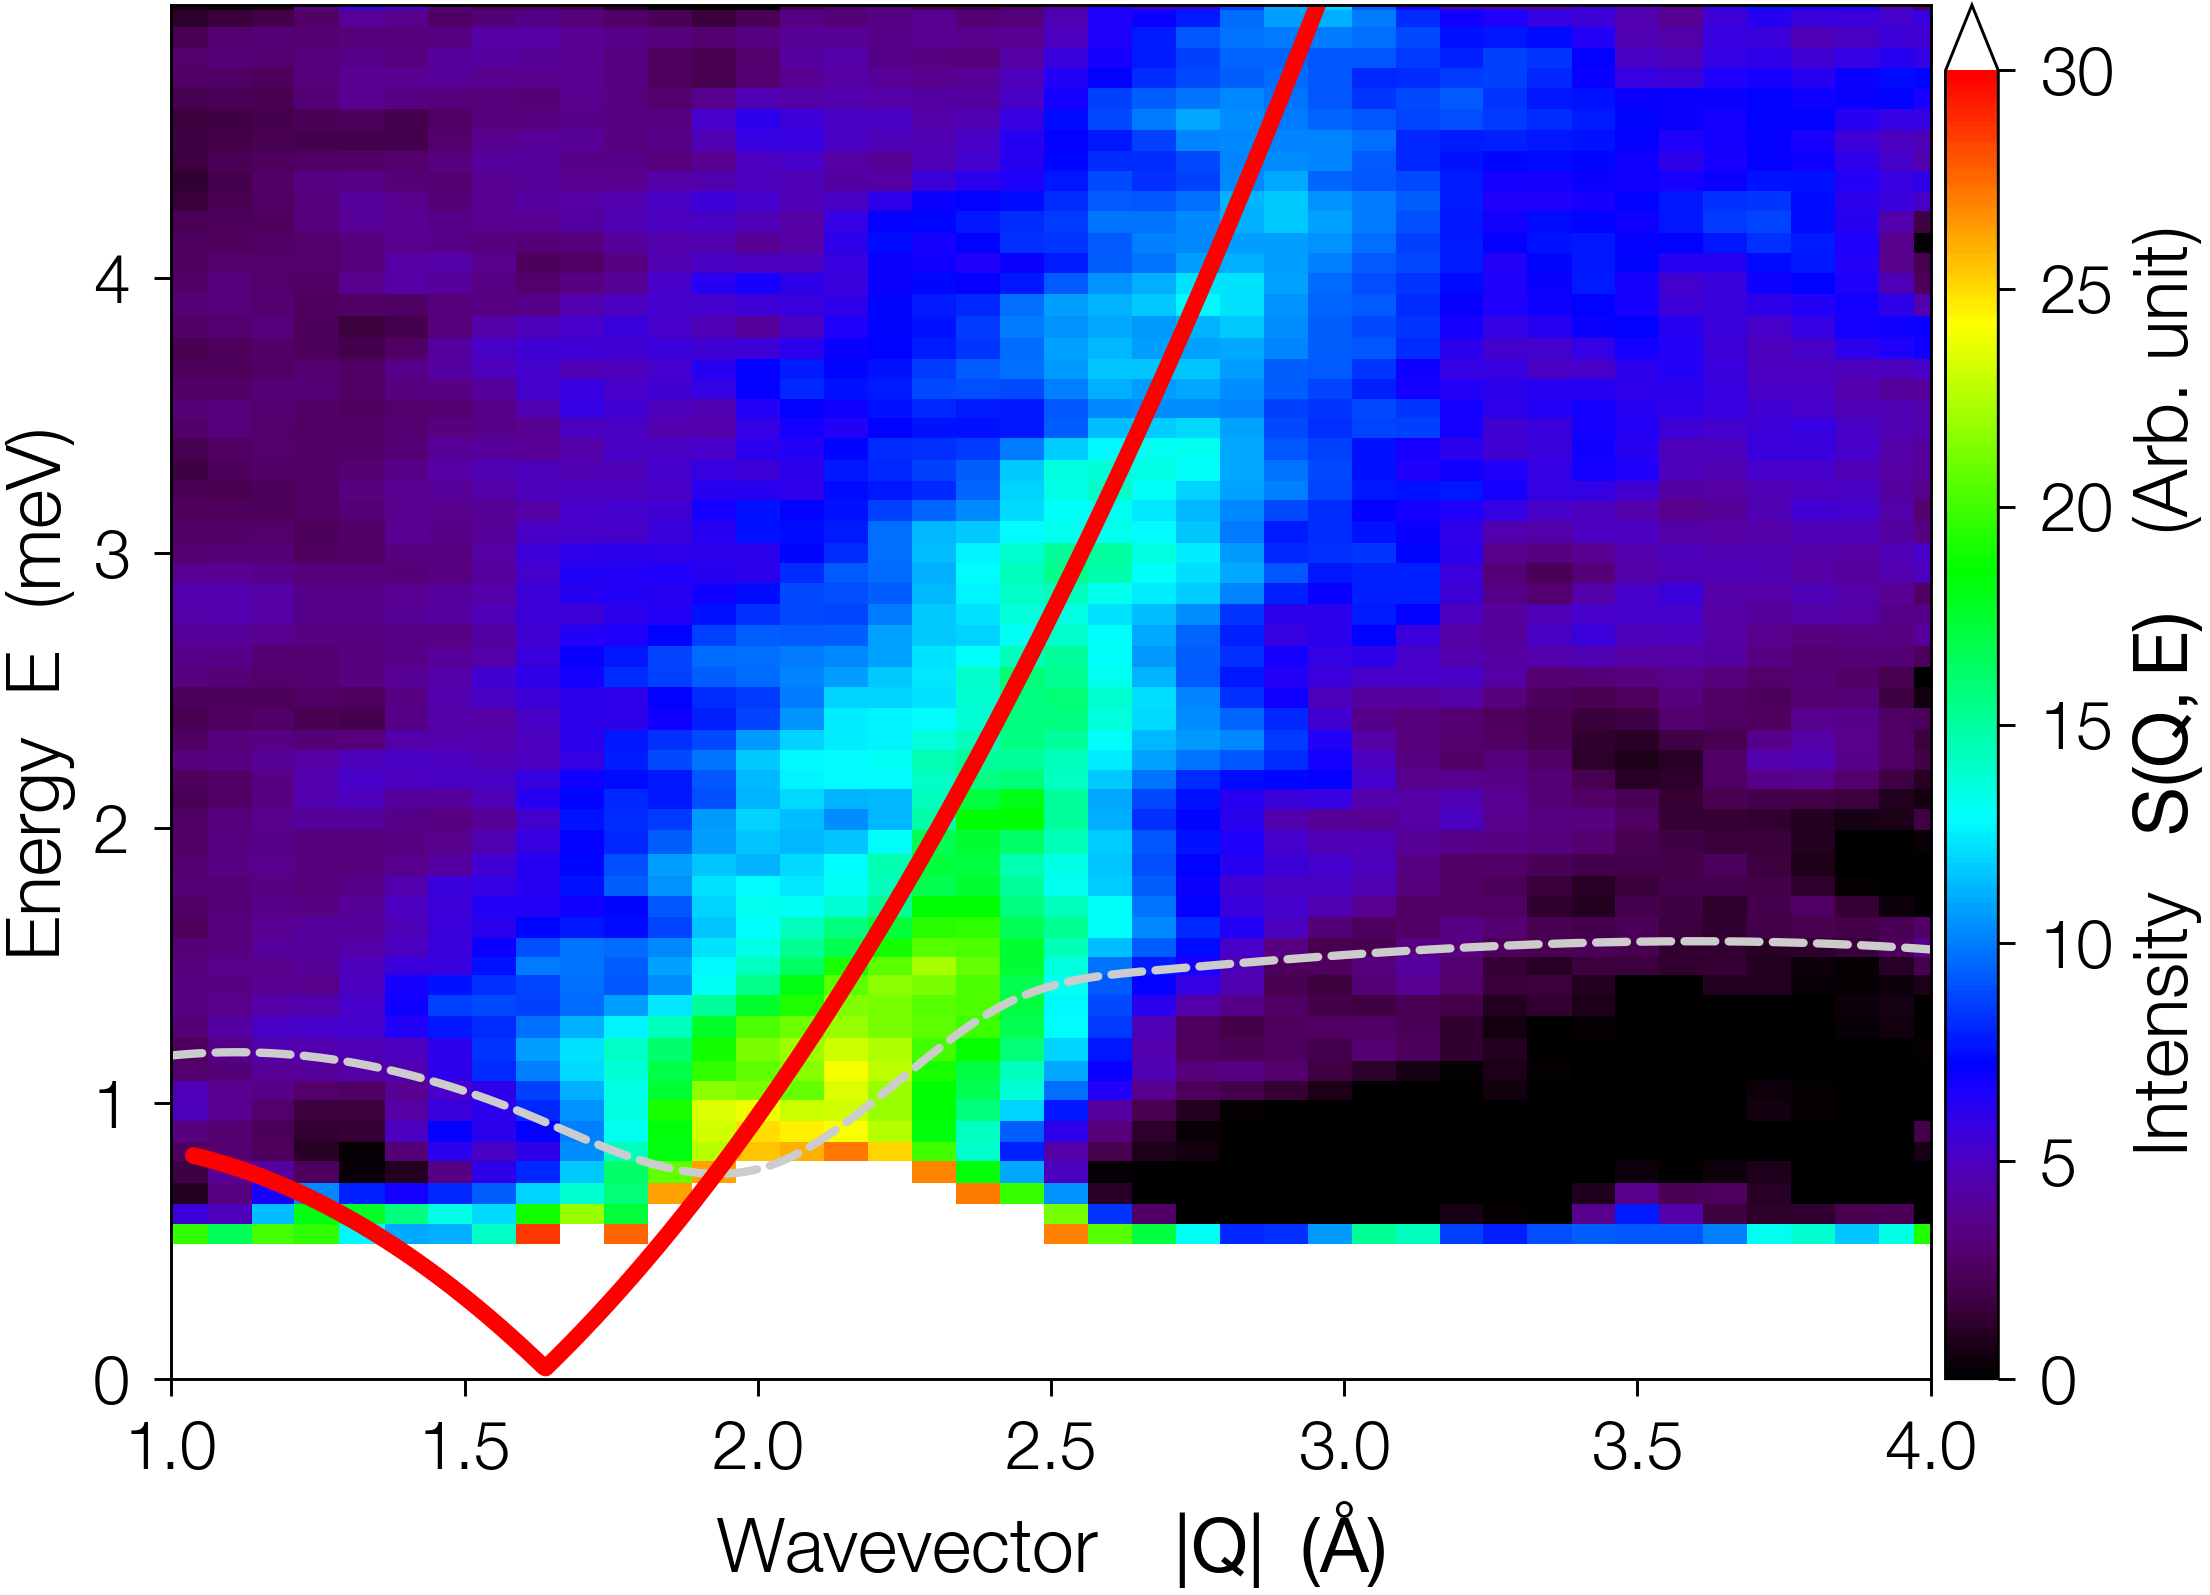

In [93]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.colors as mpl_colors
from copy import copy

# setup a masked color pallette
palette = copy(cmap)
palette.set_over('w', 1.0)
palette.set_under('k', 1.0)
    
plt.style.reload_library()
with plt.style.context(plot_style['sans']):
    figsize=plt.rcParams['figure.figsize']    
    set_custom_font(font_path)

    fig,ax = plt.subplots(1,1,figsize=(figsize[0],0.8*figsize[0]),constrained_layout=True, dpi=300)

    # nipy_spectral is also good
    pcm = ax.pcolormesh(Qmesh-0*(Q[5]-Q[4]),Emesh,S, edgecolor='None', rasterized=True, shading='auto', 
                        norm=mpl_colors.Normalize(vmin=0.0, vmax=30),cmap=palette, snap=True)
    #pcm = ax.imshow(S.T, rasterized=True, interpolation='lanczos', origin='lower',
    #                    extent=[np.min(Q),np.max(Q),np.min(E),np.max(E)],cmap=palette, vmin=0, vmax=30, aspect='auto')

    ax.plot(_Q,ϵ, color='#CCCCCC', ls='--')
    #ax.plot(LL_threshold[:,0],LL_threshold[:,1], color=colors[1], ls='-', lw=1)
    ax.plot(_Q+(Q[5]-Q[4])/2,_ω+(E[5]-E[4])/2, color=colors[-1], ls='-', lw=2)
    
    #ax.plot(Q_th,ω(1,Q_th-1.8,0.75,0.9), color=colors[-30], ls='-', lw=2)


    ax.set_xlabel(r'Wavevector  $\;\;|Q|\;\;  ( Å )$')
    ax.set_ylabel(r'Energy  E  (meV)')
    ax.set_ylim(0,4.99)
    ax.set_xlim(1.0,4)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.025)

    plt.colorbar(pcm, cax=cax, label=r'Intensity $\;\;S(Q,E)\;\;$  (Arb. unit)',  extend='max')
    plt.savefig('../figures/SQE_blk.pdf', dpi=600)

In [68]:
Qnew

array([0.48156, 0.51907, 0.57655, 0.65107, 0.72553, 0.80047, 0.87549,
       0.9498 , 1.025  , 1.0996 , 1.1743 , 1.2449 , 1.3261 , 1.4009 ,
       1.4745 , 1.5496 , 1.6253 , 1.7002 , 1.7749 , 1.8501 , 1.925  ,
       1.9999 , 2.0749 , 2.15   , 2.2251 , 2.3    , 2.3751 , 2.4501 ,
       2.525  , 2.5999 , 2.6751 , 2.7501 , 2.8251 , 2.9    , 2.975  ,
       3.0501 , 3.1252 , 3.2001 , 3.2751 , 3.3502 , 3.4252 , 3.5002 ,
       3.5751 , 3.6502 , 3.7253 , 3.8002 , 3.8751 , 3.9502 , 3.9937 ])

In [69]:
Enew

array([-0.022807,  0.014413,  0.076081,  0.15252 ,  0.22833 ,  0.30344 ,
        0.37788 ,  0.45173 ,  0.52489 ,  0.59745 ,  0.66935 ,  0.75488 ,
        0.82543 ,  0.89541 ,  0.97854 ,  1.0472  ,  1.1153  ,  1.1962  ,
        1.2763  ,  1.3557  ,  1.4341  ,  1.499   ,  1.5632  ,  1.6397  ,
        1.7154  ,  1.7903  ,  1.8645  ,  1.9501  ,  2.0348  ,  2.1067  ,
        2.1777  ,  2.2481  ,  2.3179  ,  2.3984  ,  2.478   ,  2.5455  ,
        2.6235  ,  2.7007  ,  2.7769  ,  2.8523  ,  2.927   ,  3.0007  ,
        3.0738  ,  3.1562  ,  3.2275  ,  3.2981  ,  3.3778  ,  3.4565  ,
        3.5247  ,  3.592   ,  3.6682  ,  3.7434  ,  3.8178  ,  3.9003  ,
        3.9818  ,  4.0533  ,  4.124   ,  4.2025  ,  4.28    ,  4.3481  ,
        4.4237  ,  4.4983  ,  4.5719  ,  4.6527  ,  4.7244  ,  4.7952  ,
        4.8728  ,  4.9493  ,  4.9948  ])